## Importing libraries

In [139]:
import pandas as pd
import numpy as np

## Reading the data

In [140]:
#Reading data from the csv file
df = pd.read_csv(r"C:\Users\riyas\Downloads\BTC-USD.csv")

In [141]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523
1,2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075
2,2022-01-30,38151.917969,38266.339844,37437.710938,37917.601563,37917.601563,14643548444
3,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465
4,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
...,...,...,...,...,...,...,...
361,2023-01-24,22929.626953,23134.011719,22549.744141,22636.468750,22636.468750,26405069715
362,2023-01-25,22639.267578,23722.099609,22406.076172,23117.859375,23117.859375,30685366709
363,2023-01-26,23108.955078,23237.078125,22911.373047,23032.777344,23032.777344,26357839322
364,2023-01-27,23030.716797,23417.720703,22654.593750,23078.728516,23078.728516,25383335641


## Checking for null values

In [142]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Ploting the camdle stick pattern of whole data

In [143]:
dfpl = df[0:366]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.show()

## Making the gri index function

## GAPO index = log(Highest High(n) - Lowest Low(n)) / log(n)

In [144]:
def adder(df,times):
    
    for i in range(1,times+1):
        new_column = np.zeros((len(df),1),dtype = float)
        df = np.append(df,new_column,axis = 1)
    
    return df

In [145]:
def deleter(df,index,times):
    for i in range(1,times+1):
        df = np.delete(df,index,axis = 1)
    return df

In [146]:
def jump(df,jump):
    df = df[jump:, ]
    return df

In [147]:
def gri_index(df,lookback,high,low,where):
    df = adder(df,1)
    
    for i in range(len(df)):
        try:
            df[i,where] = abs(np.log(max(df[i-lookback+1:i+1,high]) - min(df[i-lookback+1:i+1,low]))/np.log(lookback))
        except ValueError:
            pass
    return df

In [148]:
lookback = 14
my_data = gri_index(df,lookback,1,2,4)

In [149]:
my_data

array([['2022-01-28', 37128.445313, 37952.878906, ..., 37784.332031,
        22238830523, 0.0],
       ['2022-01-29', 37780.714844, 38576.261719, ..., 38138.179688,
        17194183075, 0.0],
       ['2022-01-30', 38151.917969, 38266.339844, ..., 37917.601563,
        14643548444, 0.0],
       ...,
       ['2023-01-26', 23108.955078, 23237.078125, ..., 23032.777344,
        26357839322, 0.0],
       ['2023-01-27', 23030.716797, 23417.720703, ..., 23078.728516,
        25383335641, 0.0],
       ['2023-01-28', 23086.451172, 23163.541016, ..., 23009.070313,
        21833005056, 0.0]], dtype=object)

## Ploting the candle stick pattern and gsi index together

In [150]:
import matplotlib.pyplot as plt

In [151]:
print(my_data[0][0])

2022-01-28


In [152]:
# plotting the candle sticks

dfpl = df[0:366]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.show()

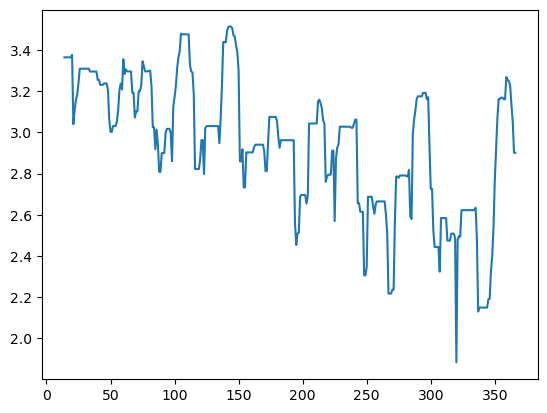

In [153]:
#plotting the candle stick and gri index 

dfpl = df[0:366]
import plotly.graph_objects as go
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
                open=dfpl['Open'],
                high=dfpl['High'],
                low=dfpl['Low'],
                close=dfpl['Close'])])

fig.show()

x = []

for i in range(13,len(my_data)):
    #print(my_data[i][0])
    x.append(i+1)

y = []

for i in range(13,len(my_data)):
    y.append(my_data[i][4])

#x = my_data[1][0]
#y = my_data[4]

plt.plot(x,y)
plt.show()
#x

## Doing EDA on the dataset via decsribing,plotting, finding the pattern and using moving averages

In [154]:
#doing the EDA on the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,26617.519932,27136.235544,26038.380395,26579.105533,26579.105533,2.930689e+10
std,9642.765245,9861.219035,9407.467430,9629.837399,9629.837399,1.244597e+10
min,15782.300781,16253.047852,15599.046875,15787.284180,15787.284180,7.714767e+09
25%,19326.514648,19636.722168,19025.690430,19325.394043,19325.394043,2.164665e+10
50%,21616.620118,22377.061524,21084.220703,21619.246094,21619.246094,2.771707e+10
75%,37711.449219,38629.461914,36807.941407,37713.602539,37713.602539,3.375638e+10
max,47456.898438,48086.835938,47100.437500,47465.730469,47465.730469,1.189925e+11


In [155]:
df.nunique()

Date         366
Open         366
High         366
Low          366
Close        366
Adj Close    366
Volume       366
dtype: int64

In [156]:
df['Close'].describe()

count      366.000000
mean     26579.105533
std       9629.837399
min      15787.284180
25%      19325.394043
50%      21619.246094
75%      37713.602539
max      47465.730469
Name: Close, dtype: float64

In [157]:
#high variance indicates the high volatility
#min and max values indicates the change in values in last one year

In [158]:
df['Return'] = df['Adj Close'].pct_change()

In [159]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2022-01-28,37128.445313,37952.878906,36211.109375,37784.332031,37784.332031,22238830523,NaN
1,2022-01-29,37780.714844,38576.261719,37406.472656,38138.179688,38138.179688,17194183075,0.009365
2,2022-01-30,38151.917969,38266.339844,37437.710938,37917.601563,37917.601563,14643548444,-0.005784
3,2022-01-31,37920.281250,38647.261719,36733.574219,38483.125000,38483.125000,20734730465,0.014915
4,2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328,0.006760
...,...,...,...,...,...,...,...,...
361,2023-01-24,22929.626953,23134.011719,22549.744141,22636.468750,22636.468750,26405069715,-0.012992
362,2023-01-25,22639.267578,23722.099609,22406.076172,23117.859375,23117.859375,30685366709,0.021266
363,2023-01-26,23108.955078,23237.078125,22911.373047,23032.777344,23032.777344,26357839322,-0.003680
364,2023-01-27,23030.716797,23417.720703,22654.593750,23078.728516,23078.728516,25383335641,0.001995


In [160]:
# indicates the mean return of consecutive days difference
np.mean(df['Return'])

-0.0008066426410624238

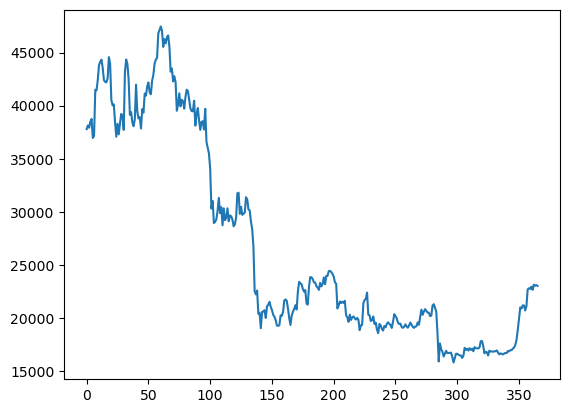

In [161]:
#indicating the overall treand for the last one year of price(adj closing price)
#the trend was downward for the last year
adj_close = df['Adj Close'].plot(style = ['-'])

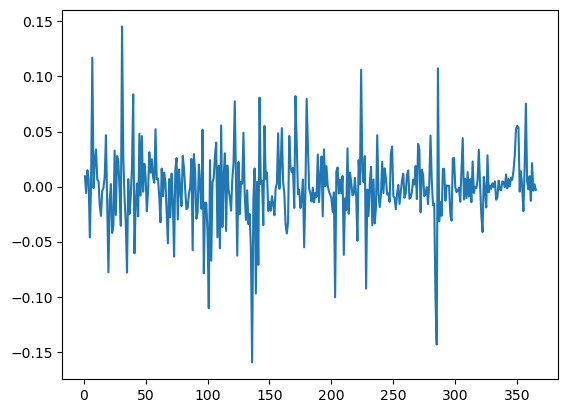

In [162]:
# graphical representation of returns
#the peaks indicating volatile days at particular index
returns = df['Return'].plot(style = ['-'])

<AxesSubplot:>

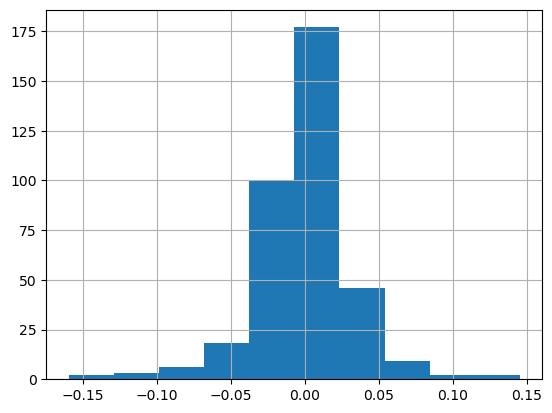

In [163]:
#can be indicated from the graph that the chances of loss is more
#in one day trading frame
df['Return'].hist()

<AxesSubplot:ylabel='Density'>

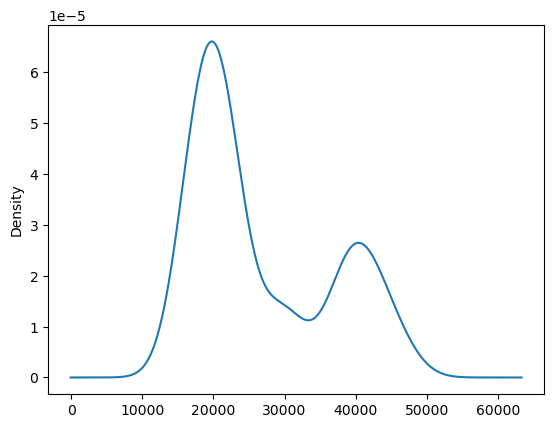

In [164]:
df['Adj Close'].plot(kind = 'kde')

<AxesSubplot:>

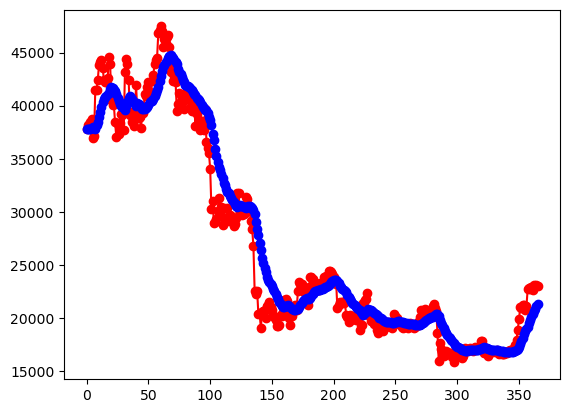

In [165]:
#exponential smoothing 

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(df['Adj Close']).fit(smoothing_level = 0.1, optimized = False)

df['Adj Close'].plot(marker = 'o', color = 'red')
model.fittedvalues.plot(marker = 'o', color = 'blue')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

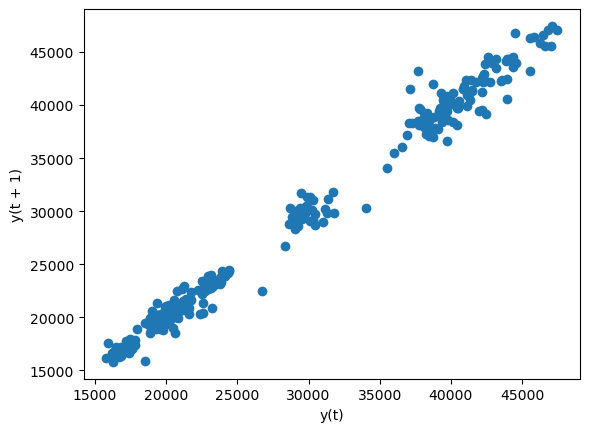

In [166]:
# log pattern to check if the series is random or not
# points are deviating little bit from the straight line
from pandas.plotting import lag_plot
lag_plot (df['Adj Close'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

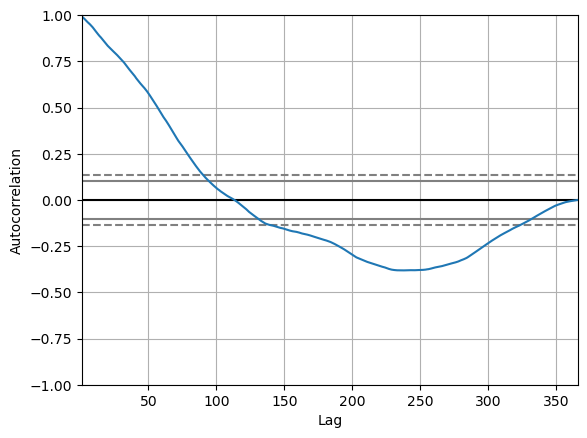

In [167]:
#auto correlation plot
#here we have plot outside of the boundary from the given lines, so we can say
#that there is some pattern, it's not totally random

from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Adj Close'])

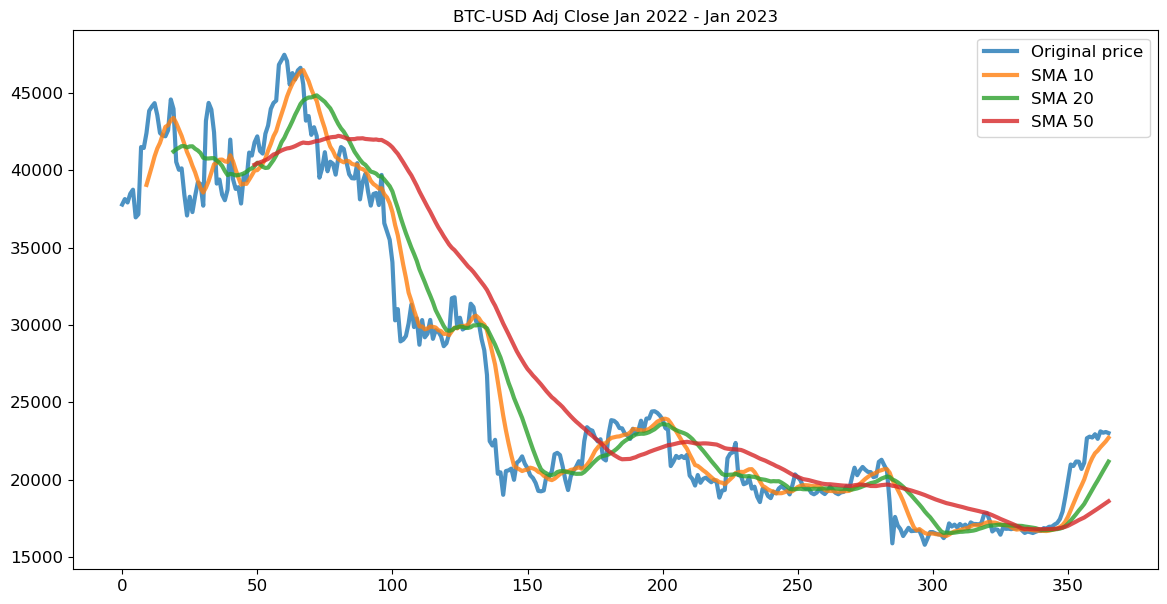

In [168]:
#implementing the moving average on the data given
#implementing simple moving averages on the adj closing data for time period of
#10 days, 20 days and 50 days 
#SMA50 is the indication of the trend, it is below the adj closing price 
#for the upward movement and above the adj closing price for the downward trend
#less size sma will be close to the actual price

btc_rec = df['Adj Close']
sma_10 = btc_rec.rolling(window=10).mean()
sma_20 = btc_rec.rolling(window=20).mean()
sma_50 = btc_rec.rolling(window=50).mean()
plt.figure(figsize = (14,7))
plt.plot(btc_rec.index,btc_rec,lw = 3,alpha = 0.8,label = 'Original price')
plt.plot(btc_rec.index,sma_10,lw = 3,alpha = 0.8,label = 'SMA 10')
plt.plot(btc_rec.index,sma_20,lw = 3,alpha = 0.8,label = 'SMA 20')
plt.plot(btc_rec.index,sma_50,lw = 3,alpha = 0.8,label = 'SMA 50')
plt.title('BTC-USD Adj Close Jan 2022 - Jan 2023')
plt.tick_params(labelsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.show()

In [169]:
spy = df.Close.to_frame()
spy

,Close
0,37784.332031
1,38138.179688
2,37917.601563
3,38483.125000
4,38743.273438
...,...
361,22636.468750
362,23117.859375
363,23032.777344
364,23078.728516


In [170]:
#implementing the exponential moving average (considering 50 as the time period)
spy["EMA50"] = spy.Close.ewm(span = 50, min_periods = 50).mean()

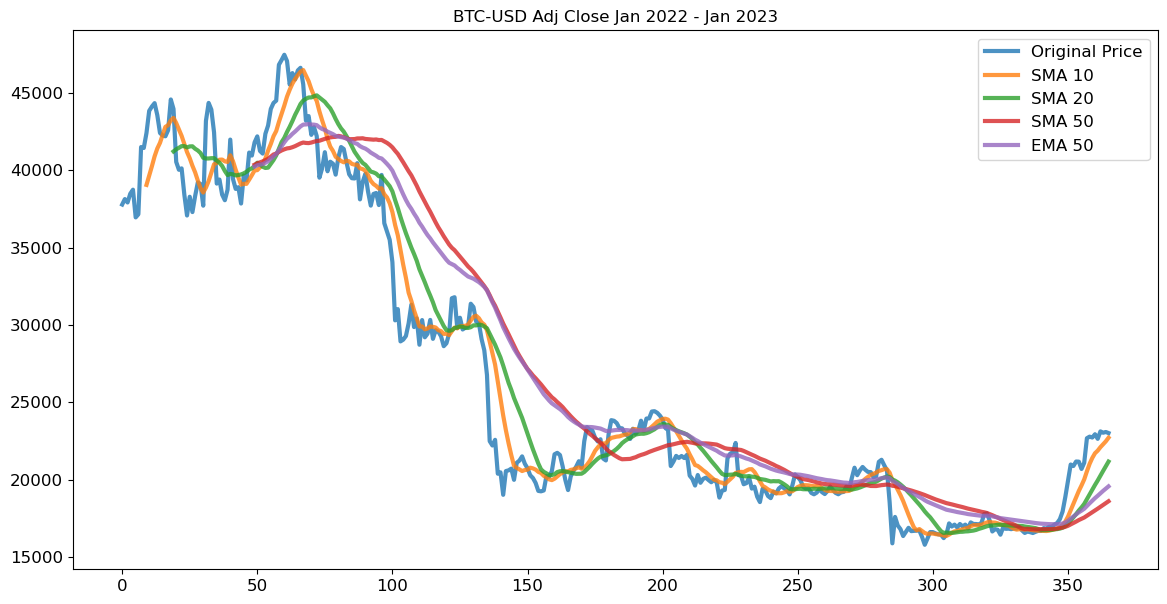

In [171]:
#plotting the figures overall
plt.figure(figsize = (14,7))
plt.plot(btc_rec.index,btc_rec,lw = 3,alpha = 0.8,label = 'Original Price')
plt.plot(btc_rec.index,sma_10,lw = 3,alpha = 0.8,label = 'SMA 10')
plt.plot(btc_rec.index,sma_20,lw = 3,alpha = 0.8,label = 'SMA 20')
plt.plot(btc_rec.index,sma_50,lw = 3,alpha = 0.8,label = 'SMA 50')
plt.plot(btc_rec.index,spy["EMA50"],lw = 3,alpha = 0.8,label = 'EMA 50')
plt.title('BTC-USD Adj Close Jan 2022 - Jan 2023')
plt.tick_params(labelsize = 12)
plt.legend(loc = 'upper right', fontsize = 12)
plt.show()